<font face="微软雅黑" size=6 color=#000000> Import Packages and Datas

In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize
from string import digits
from nltk.tokenize import RegexpTokenizer
from collections import Counter

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cengqiqi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/cengqiqi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
path_windows = "N:\\DesktopSettings\\Desktop\\DM_working\\dataset\\wiki_id_text"
path_mac = "/Users/cengqiqi/Desktop/DM_working/dataset/wiki_id_text"
wikipage = pd.read_table(path_windows,header = None)

In [7]:
wikipage.head()

,0,1
0,1928_in_association_football,The following are the football -LRB- soccer -R...
1,1986_NBA_Finals,The 1986 NBA Finals was the championship round...
2,1901_Villanova_Wildcats_football_team,The 1901 Villanova Wildcats football team repr...
3,1992_Northwestern_Wildcats_football_team,The 1992 Northwestern Wildcats team represente...
4,1897_Princeton_Tigers_football_team,The 1897 Princeton Tigers football team repres...


<font face="微软雅黑" size=6 color=#000000> Step1: Text Statistics

In [10]:
# lower case
# punctuation
# numbers 
# remove link (rrb and lrb)
# stop words

In [11]:
tmp1 = wikipage[1][0:1000000]
tmp2 = wikipage[1][1000000:2000000]
tmp3 = wikipage[1][2000000:3000000]
tmp4 = wikipage[1][3000000:4000000]
tmp5 = wikipage[1][4000000:len(wikipage)+1]

In [12]:
def countTerm(text):

    term_list=[]
    for term in text: 

        # lower case for a sentence
        term = term.lower()

#         # remove digit
#         remove_digits = str.maketrans('', '', digits)
#         term = term.translate(remove_digits)

#         # remove puncutation and append words to list
#         # version 1
#         # tokenizer = RegexpTokenizer(r'\w+')  # this will separate words like "can't"
#         # version 2
#         tokenizer = RegexpTokenizer("[\w']+") # this will not separate words like "can't"
#         temp_list = tokenizer.tokenize(term)

        # version 3 
        pattern = r"""(?x)                  
                              (?:[A-Z]\.)+           # abbreviations, e.g. U.S.A. 
                              |\$?\d+(?:,\d+)*(?:\.\d+)?%? # 2,000 or 2.5
                              |\w+(?:[-']\w+)*      # words w/ optional internal hyphens/apostrophe  e.g. can't
                            """
        temp_list = nltk.regexp_tokenize(term, pattern)
        
        # lemmatize
        temp_list = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in temp_list] # only Lancaster
    
    
  
        # count frequency of term 

#         # method1
#         term_count = Counter()
#         temp_count = Counter(temp_list)
#         term_count = term_count + temp_count

        # method2
        term_list.extend(temp_list)

    term_count = Counter(term_list)
    return term_count

#     #     print(total_list)
#     #     print('--------------------------------')
#     #     print('--------------------------------')

In [15]:
term_count_1 = countTerm(tmp1)

In [16]:
term_count_2 = countTerm(tmp2)

In [17]:
term_count_3 = countTerm(tmp3)

In [18]:
term_count_4 = countTerm(tmp4)

In [19]:
term_count_5 = countTerm(tmp5)

In [20]:
term_count_total = term_count_1+term_count_2+term_count_3+term_count_4+term_count_5

In [21]:
term_count = dict(term_count_total)

In [25]:
import csv 

with open('term_count.csv', 'w', encoding="utf-8",newline='') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in term_count.items():
        writer.writerow([key, value])

<font face="微软雅黑" size=6 color=#000000> Step2: Zips Law visualisation

In [2]:
# load word count
term_count = pd.read_csv('term_count.csv', header = None)

In [3]:
len(term_count)

4104303

In [18]:
#prepare x and y
x = term_count[1].value_counts().index
y = (term_count[1].value_counts().values)/sum(term_count[1].value_counts().values)

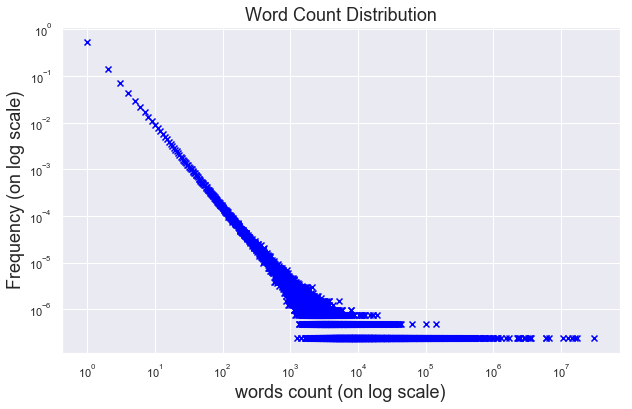

In [24]:
import os
sns.set(color_codes=True)
plt.figure(figsize=(10, 6))

plt.xscale('log')
plt.yscale('log')
plt.scatter(x, y, marker = 'x', facecolor = 'blue', label='empirical data')

plt.xlabel('words count (on log scale)', fontsize = 18)
plt.ylabel('Frequency (on log scale)', fontsize = 18)
plt.title('Word Count Distribution', fontsize = 18)

plt.savefig('word count distribution.png', format='png', dpi=300)

In [20]:
x = range(1,len(term_count[1])+1)
y = sorted(term_count[1]/sum(term_count[1]),reverse=True)

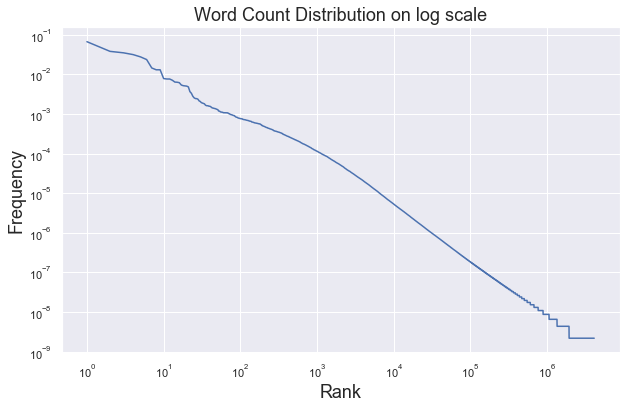

In [21]:
import os
sns.set(color_codes=True)
plt.figure(figsize=(10, 6))


plt.loglog(x, y)
plt.xlabel('Rank', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('Word Count Distribution on log scale', fontsize = 18)



plt.savefig('word count distribution.png', format='png', dpi=300)


In [23]:
# rank (r) of a word times its frequency (f) is approximately a constant (k)
rank = np.array(x)
frequncy = np.array(y)
print(rank*frequncy)

[0.06704176 0.07644463 0.1052822  ... 0.00894734 0.00894734 0.00894734]


<font face="微软雅黑" size=6 color=#000000> Step3: Compute parameter

In [20]:
# least square
# x = term_count[1].value_counts().index
# y = (term_count[1].value_counts().values)/sum(term_count[1].value_counts().values)

# x = x[0:int(len(x)*4/7)]
# y = y[0:int(len(y)*4/7)]

logx = np.array(np.log(x)).reshape(-1,1)
logy = np.array(np.log(y)).reshape(-1,1)

w = np.linalg.inv(logx.T@logx)@logx.T@logy
print('The parameter is ', -w[0])

The parameter is  [1.34191852]
